In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

In [286]:
!pip install gdown

In [287]:
!gdown 1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_

Downloading...
From: https://drive.google.com/uc?id=1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_
To: C:\Users\HP\Downloads\heart.csv

  0%|          | 0.00/11.3k [00:00<?, ?B/s]
100%|##########| 11.3k/11.3k [00:00<00:00, 11.3MB/s]


In [288]:
data = pd.read_csv('heart.csv')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [289]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

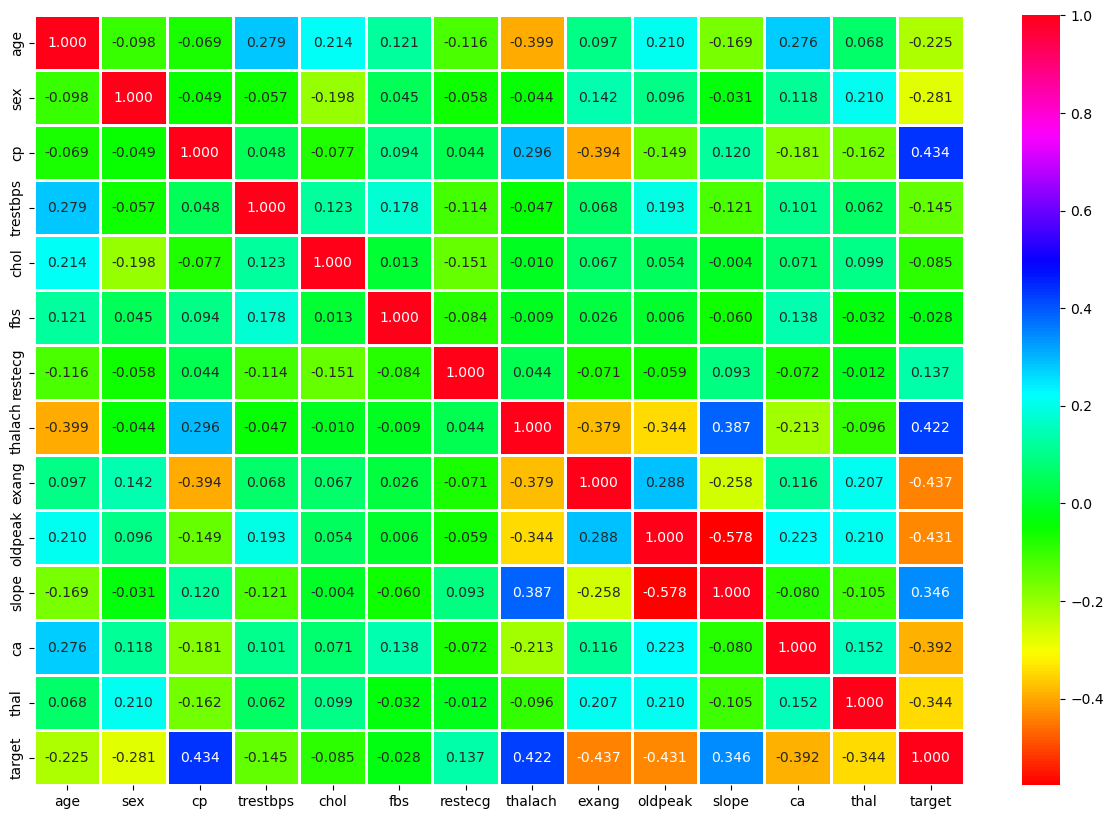

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

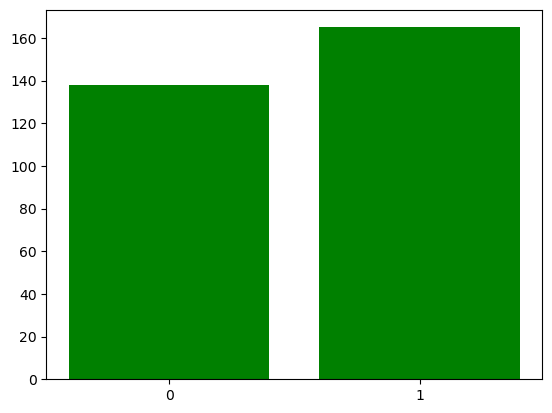

In [291]:
target_counts = data.groupby('target').size()
plt.bar(target_counts.index.astype(str),target_counts,color='green')
plt.show()

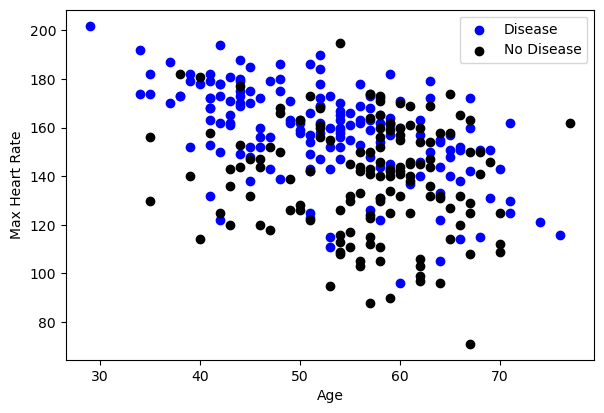

In [292]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],c='blue')
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

In [293]:
X = data.drop('target',axis=1)
y = data['target']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
#skalrame podatoci ( mora kaj nevronskite mrezi)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [295]:
X.shape[1] #broj na features

13

In [296]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    #input layer
    Dense(32, kernel_initializer="uniform", activation="relu"),
    #hidden layers, tuka imame 2 hidden layers(nie odlucuvame kolku sakame da ima)
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    #output layer tuka e 1 zatoa sto imame eden output zabolen/ne e zabolen
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

In [297]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [298]:
#loss funkcija e binary_crossentropy bidejki imame klasifikacija(binarna 1 - bolen 0 - ne e bolen);
#loss = 'mean_squared_error' (MSE ili MAE) za REGRESIJA ako predviduvame numericka promenliva
# loss = 'categorical_crossentropy'za KLASIFIKACIJA(target promenlivata ne e binarna , imame povekje od 2 output vrednosti : 0 1 2 3 4 itn)

In [299]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265 (4.94 KB)

 Trainable params: 1,265 (4.94 KB)

 Non-trainable params: 0 (0.00 B)

In [300]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=50, batch_size=8)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5096 - loss: 0.6930 - val_accuracy: 0.5600 - val_loss: 0.6923
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5897 - loss: 0.6917 - val_accuracy: 0.5600 - val_loss: 0.6900
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5746 - loss: 0.6873 - val_accuracy: 0.6800 - val_loss: 0.6718
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6722 - loss: 0.6666 - val_accuracy: 0.8000 - val_loss: 0.6208
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7553 - loss: 0.6011 - val_accuracy: 0.8800 - val_loss: 0.5433
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7900 - loss: 0.5519 - val_accuracy: 0.8800 - val_loss: 0.4744
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8121 - loss: 0.4610 - val_accuracy: 0.8800 - val_loss: 0.4182
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8246 - loss: 0.4597 - val_accuracy: 0.8400 - val_loss

<Axes: >

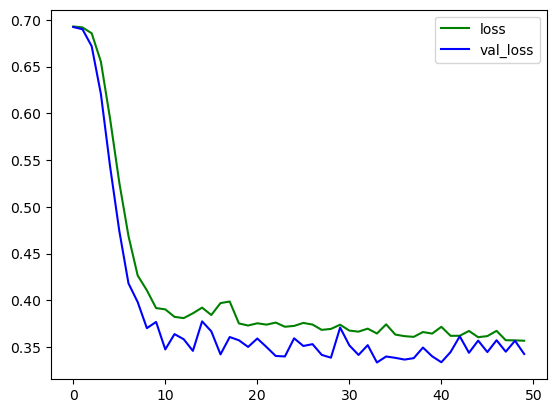

In [301]:
sns.lineplot(history.history['loss'], label='loss',color='green')
sns.lineplot(history.history['val_loss'], label='val_loss',color='blue')

In [302]:
pred_y = model.predict(test_X).round() #modelot predviduva , round() se pravi samo kaj klasifikacija

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


<Axes: >

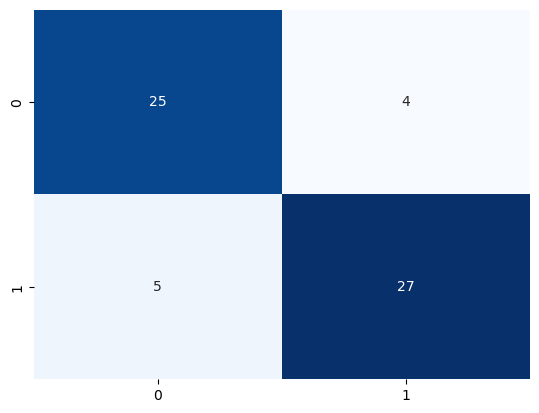

In [303]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [304]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [305]:
!gdown 11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H

Downloading...
From: https://drive.google.com/uc?id=11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H
To: C:\Users\HP\Downloads\Admission_Predict.csv

  0%|          | 0.00/12.9k [00:00<?, ?B/s]
100%|##########| 12.9k/12.9k [00:00<00:00, 12.7MB/s]


In [306]:
data1 = pd.read_csv('Admission_Predict.csv')
data1.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [307]:
data1.drop('Serial No.',axis=1,inplace=True)
data1.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


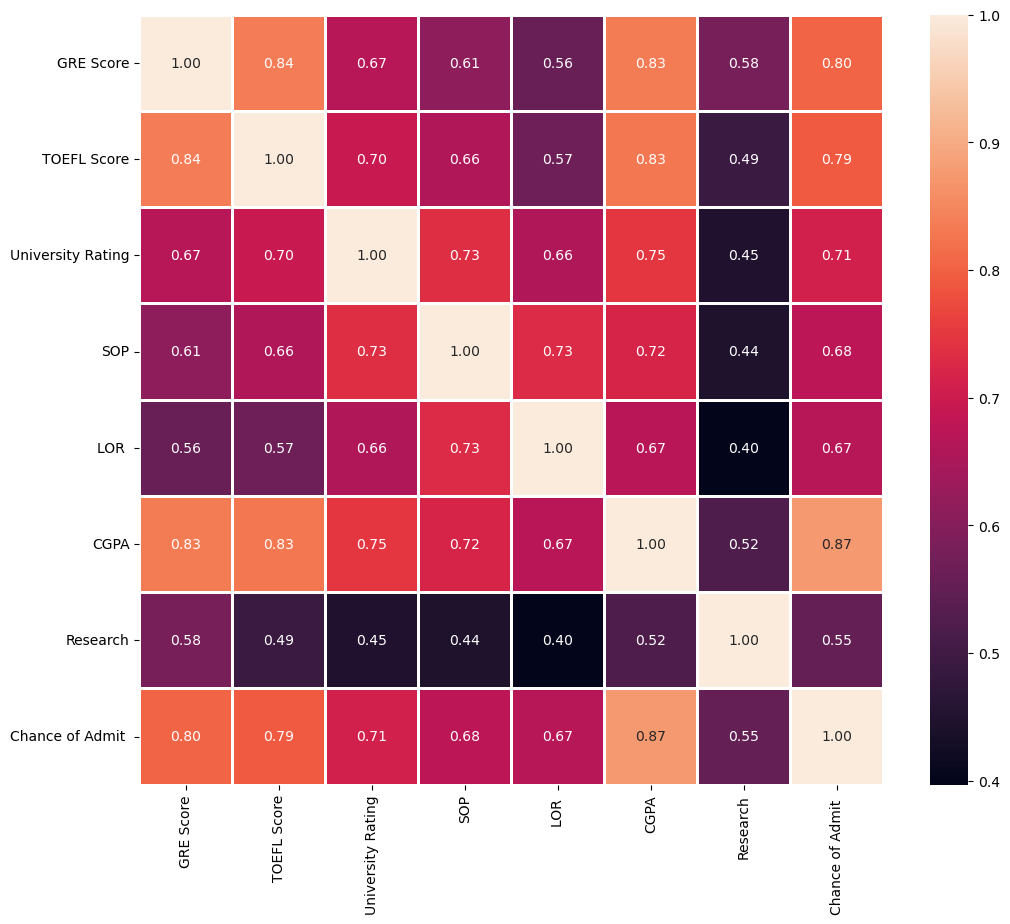

In [308]:
#bidejki site ni se numericki pravime heatmap na cel dataset
plt.figure(figsize=(12, 10))
sns.heatmap(data1.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()
     

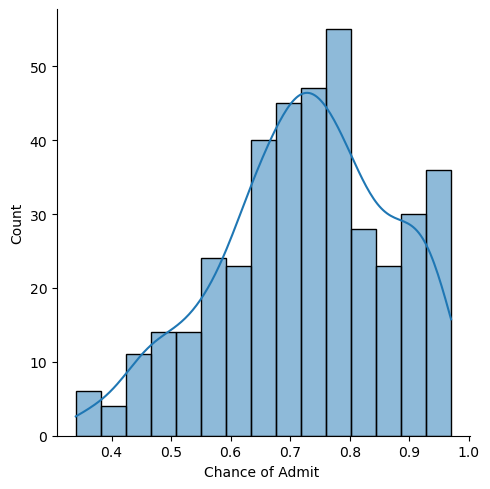

In [309]:
sns.displot(data1['Chance of Admit '],kde=True,bins=15)
plt.show()

In [310]:
X = data1.drop('Chance of Admit ',axis=1)
y = data1['Chance of Admit ']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
X.shape[1]

7

In [312]:
model = Sequential([
    Input(shape=(7,)),
    #input layer
    Dense(8, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    #2 hidden layers
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

In [313]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [314]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [ ]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64


In [ ]:
pred_y = model.predict(test_X)

In [ ]:
print("R2 score:",r2_score(test_y,pred_y))